# Figures for "Inflation and its consequences"

UWNow broadcast July 12, 2022

Kim J. Ruhl // July 13, 2022 // ruhl2@wisc.edu

These figures are slightly different from those presented in the broadcast as the June inflation numbers were released the day after the broadcast and are included here.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as web

import matplotlib.dates as mdates

# Define figure constants
fig_tick_size = 18
fig_line_wt = 2.5
date_fmt = mdates.DateFormatter('%b %y')

# Business cycle dates
cycle = pd.read_csv('cycle dates pasted.csv')
cycle.peak = pd.to_datetime(cycle.peak)
cycle.trough = pd.to_datetime(cycle.trough)

In [7]:
def last_obs(df):
    return 'Last observation: ' + dt.datetime.strftime(df.tail(1).index.date[0], '%B, %Y')

### Data from FRED

In [8]:

ff = web.DataReader(['FEDFUNDS'], 'fred', '1960-01-01')
nat = web.DataReader(['CPIAUCSL'], 'fred', '2019-01-01')
nat_long = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', '1959-01-01')
nat['inf'] = nat['CPIAUCSL'].pct_change(12)*100
nat_long['inf_lfe'] = nat_long['CPILFESL'].pct_change(12)*100
nat_long['inf'] = nat_long['CPIAUCSL'].pct_change(12)*100

nat.tail()

,CPIAUCSL,inf
DATE,,
2022-02-01,284.182,7.912024
2022-03-01,287.708,8.557586
2022-04-01,288.663,8.224139
2022-05-01,291.474,8.516413
2022-06-01,295.328,8.995221


### CPI by good and region

Created in file create_cpi_dataset.ipynb

In [9]:
cpis = pd.read_csv('cpis.csv', index_col='date', parse_dates=['date']).sort_index()

In [10]:
cpis_yy = cpis.pct_change(12)*100
cpis_yy.tail()

,midwest,midwestA,midwestBC,midwestENC,apparel,education,foodbev,housing,medical,recreation,transportation
date,,,,,,,,,,,
2022-02-01,7.980710,7.401566,8.328219,7.428150,3.862915,1.005587,8.374962,6.382228,1.007479,4.247867,21.218992
2022-03-01,8.554860,8.019398,8.874613,7.880768,4.321026,0.043219,9.683174,6.486134,1.621216,4.266753,22.649326
2022-04-01,8.248411,7.871903,8.469718,7.777540,4.529265,0.007801,10.665209,6.342543,2.182771,4.560510,19.439842
2022-05-01,8.815877,8.509679,8.997407,7.738308,4.198436,-0.242588,11.359077,7.071949,2.682060,4.229123,19.703057
2022-06-01,9.496447,9.235374,9.653117,8.436323,5.712086,-0.424435,11.296759,7.826640,3.587683,4.476067,20.331285


### Regional inflation rates

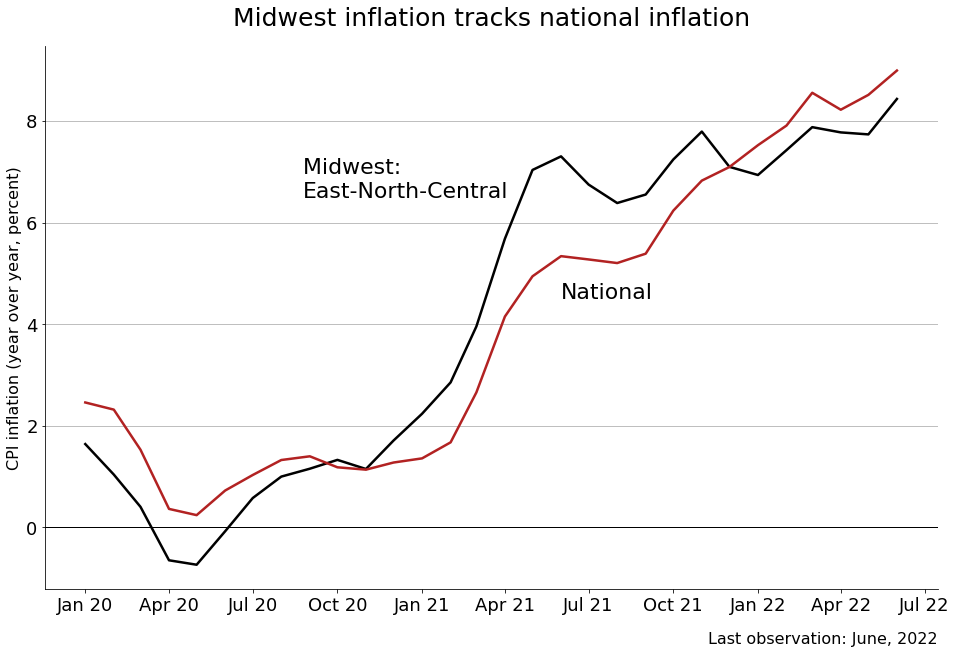

In [11]:
fig, ax = plt.subplots(figsize=(16,10))
sns.despine()

ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.xaxis.set_major_formatter(date_fmt)

ax.set_title('Midwest inflation tracks national inflation', fontsize=25, pad=20)

ax.plot(cpis_yy.index, cpis_yy['midwestENC'], color='black', lw=fig_line_wt, label='Midwest:East-North-Central')
ax.plot(nat.index, nat['inf'], color='firebrick', lw=fig_line_wt,  label='National')

ax.text(dt.datetime(2021,6,1), 4.5, 'National', fontsize=22)
ax.text(dt.datetime(2020,8,25), 6.5, 'Midwest: \nEast-North-Central', fontsize=22)

ax.grid(axis='y')

ax.axhline(y=0, color='black', lw=1)

ax.annotate(last_obs(cpis_yy), xy=(1, -0.1), xycoords='axes fraction', fontsize=16, ha='right')

ax.set_ylabel('CPI inflation (year over year, percent)', fontsize=16)
#ax.legend( frameon=False, fontsize=15)

plt.savefig('mw_cpi.svg', bbox_inches='tight')
plt.show()

### CPI time series

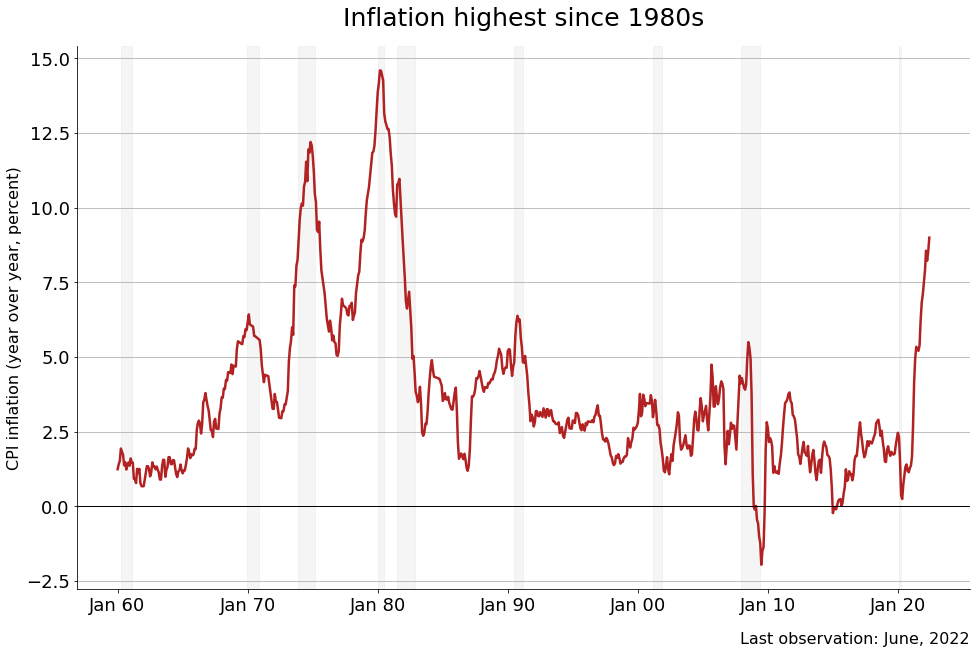

In [12]:
fig, ax = plt.subplots(figsize=(16,10))
sns.despine()
ax.tick_params(axis='both', labelsize=fig_tick_size )

ax.xaxis.set_major_formatter(date_fmt)
ax.set_title('Inflation highest since 1980s', fontsize=25, pad=20)

ax.plot(nat_long.index, nat_long['inf'], color='firebrick', lw=fig_line_wt, label='National')
#ax.plot(nat_long.index, nat_long['inf_lfe'], color='black', lw=fig_line_wt, label='National')
ax.grid(axis='y')

ax.axhline(y=0, color='black', lw=1)

ax.annotate(last_obs(nat_long), xy=(1, -0.1), xycoords='axes fraction', fontsize=16, ha='right')

for c in range(26,35):
    plt.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)

ax.set_ylabel('CPI inflation (year over year, percent)', fontsize=16)

plt.savefig('cpi_long.svg', bbox_inches='tight')
plt.show()

### CPI with and without food and energy

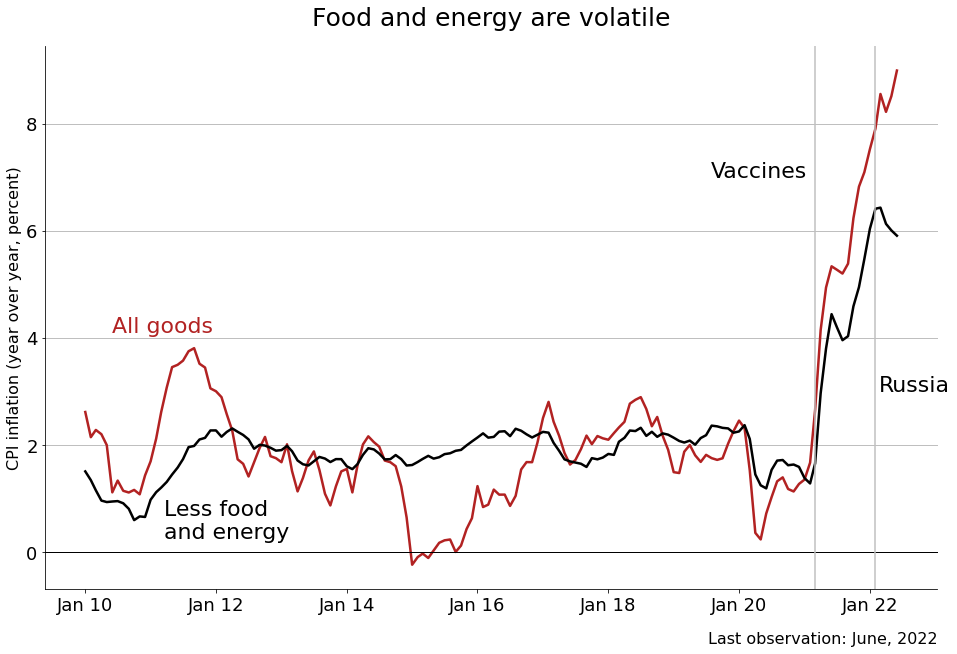

In [13]:
fig, ax = plt.subplots(figsize=(16,10))
sns.despine()
ax.tick_params(axis='both', labelsize=fig_tick_size )

ax.xaxis.set_major_formatter(date_fmt)
ax.set_title('Food and energy are volatile', fontsize=25, pad=20)

ax.plot(nat_long.loc['2010':'2022'].index, nat_long.loc['2010':'2022']['inf'], color='firebrick', lw=fig_line_wt, label='National')
ax.plot(nat_long.loc['2010':'2022'].index, nat_long.loc['2010':'2022']['inf_lfe'], color='black', lw=fig_line_wt, label='National')
#ax.plot(nat_long.index, nat_long['inf_lfe'], color='black', lw=fig_line_wt, label='National')
ax.grid(axis='y')

ax.axhline(y=0, color='black', lw=1)

ax.text(dt.datetime(2010,6,1), 4.1, 'All goods', fontsize=22, color='firebrick')
ax.text(dt.datetime(2011,3,15), 0.25, 'Less food\nand energy', fontsize=22)

ax.text(dt.datetime(2019,7,30), 7, 'Vaccines', fontsize=22)
ax.text(dt.datetime(2022,2,20), 3, 'Russia', fontsize=22)

ax.axvline(x=dt.datetime(2021,3,1), color='silver')
ax.axvline(x=dt.datetime(2022,2,1), color='silver')

ax.annotate(last_obs(nat_long), xy=(1, -0.1), xycoords='axes fraction', fontsize=16, ha='right')

#for c in range(34,35):
#    plt.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)

ax.set_ylabel('CPI inflation (year over year, percent)', fontsize=16)

plt.savefig('cpi_long_lfe.svg', bbox_inches='tight')
plt.show()

### CPI components

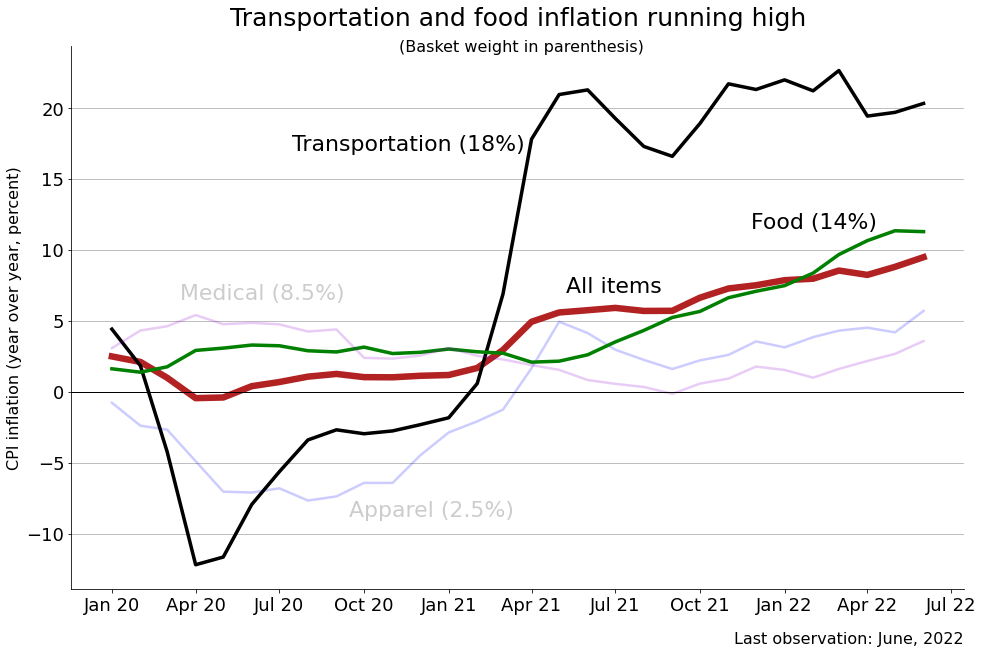

In [14]:
fig, ax = plt.subplots(figsize=(16,10))
sns.despine()
ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.xaxis.set_major_formatter(date_fmt)
ax.set_title('Transportation and food inflation running high', fontsize=25, pad=20)

ax.plot(cpis_yy.index, cpis_yy['midwest'], color='firebrick', lw=fig_line_wt+4)
ax.plot(cpis_yy.index, cpis_yy['apparel'], color='blue', lw=fig_line_wt, alpha=0.2)
ax.plot(cpis_yy.index, cpis_yy['transportation'], color='black', lw=fig_line_wt+1)

ax.plot(cpis_yy.index, cpis_yy['foodbev'], color='green', lw=fig_line_wt+1, alpha=1)
ax.plot(cpis_yy.index, cpis_yy['medical'], color='darkviolet', lw=fig_line_wt, alpha=0.2)

ax.text(dt.datetime(2020,9,15), -8.8, 'Apparel (2.5%)', fontsize=22, alpha=0.2)
ax.text(dt.datetime(2020,7,15), 17, 'Transportation (18%)', fontsize=22)
ax.text(dt.datetime(2020,3,15), 6.5, 'Medical (8.5%)', fontsize=22, alpha=0.2)
ax.text(dt.datetime(2021,11,25), 11.5, 'Food (14%)', fontsize=22, alpha=1)
ax.text(dt.datetime(2021,5,8), 7, 'All items', fontsize=22)

ax.text(dt.datetime(2020,11,8), 24, '(Basket weight in parenthesis)', fontsize=16)
ax.annotate(last_obs(cpis_yy), xy=(1, -0.1), xycoords='axes fraction', fontsize=16, ha='right')

ax.axhline(y=0, color='black', lw=1)
ax.grid(axis='y')
#ax.set_ylim(-12.5,7.5)
ax.set_ylabel('CPI inflation (year over year, percent)', fontsize=16)

plt.savefig('mw_cpi_comps_1.svg', bbox_inches='tight')

plt.show()

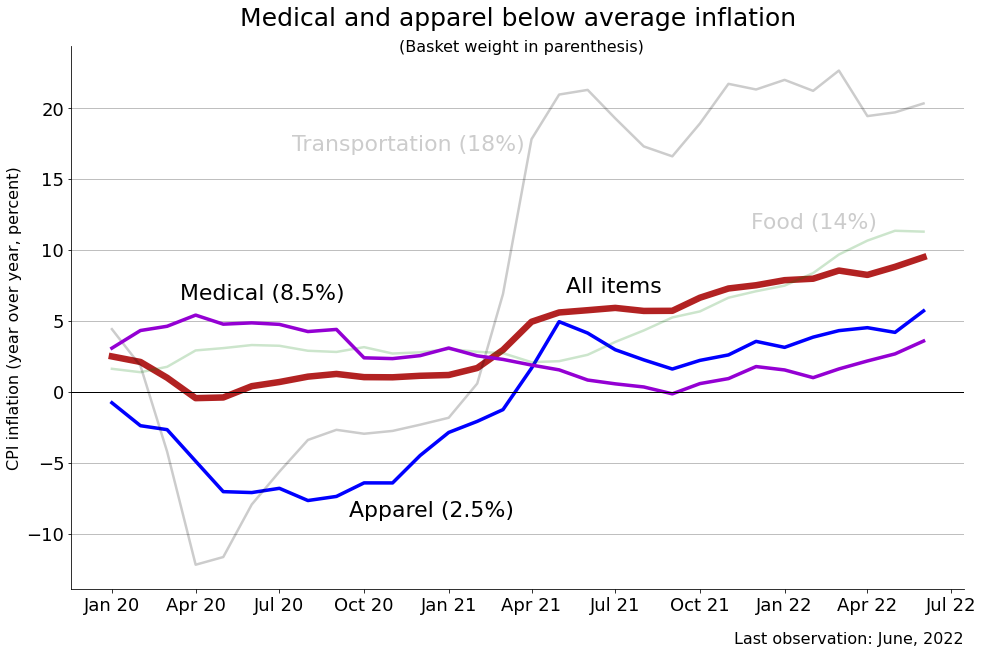

In [15]:
fig, ax = plt.subplots(figsize=(16,10))
sns.despine()
ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.xaxis.set_major_formatter(date_fmt)
ax.set_title('Medical and apparel below average inflation', fontsize=25, pad=20)

ax.plot(cpis_yy.index, cpis_yy['midwest'], color='firebrick', lw=fig_line_wt+4)
ax.plot(cpis_yy.index, cpis_yy['apparel'], color='blue', lw=fig_line_wt+1, alpha=1)
ax.plot(cpis_yy.index, cpis_yy['transportation'], color='black', lw=fig_line_wt, alpha=0.2)
ax.plot(cpis_yy.index, cpis_yy['foodbev'], color='green', lw=fig_line_wt, alpha=0.2)
ax.plot(cpis_yy.index, cpis_yy['medical'], color='darkviolet', lw=fig_line_wt+1, alpha=1)

ax.text(dt.datetime(2020,9,15), -8.8, 'Apparel (2.5%)', fontsize=22, alpha=1)
ax.text(dt.datetime(2020,7,15), 17, 'Transportation (18%)', fontsize=22, alpha=0.2)
ax.text(dt.datetime(2020,3,15), 6.5, 'Medical (8.5%)', fontsize=22, alpha=1)
ax.text(dt.datetime(2021,11,25), 11.5, 'Food (14%)', fontsize=22, alpha=0.2)
ax.text(dt.datetime(2021,5,8), 7, 'All items', fontsize=22)

ax.axhline(y=0, color='black', lw=1)
ax.grid(axis='y')
#ax.set_ylim(-12.5,7.5)
ax.set_ylabel('CPI inflation (year over year, percent)', fontsize=16)
ax.text(dt.datetime(2020,11,8), 24, '(Basket weight in parenthesis)', fontsize=16)

ax.annotate(last_obs(cpis_yy), xy=(1, -0.1), xycoords='axes fraction', fontsize=16, ha='right')

plt.savefig('mw_cpi_comps_2.svg', bbox_inches='tight')

plt.show()

### The fed funds rate

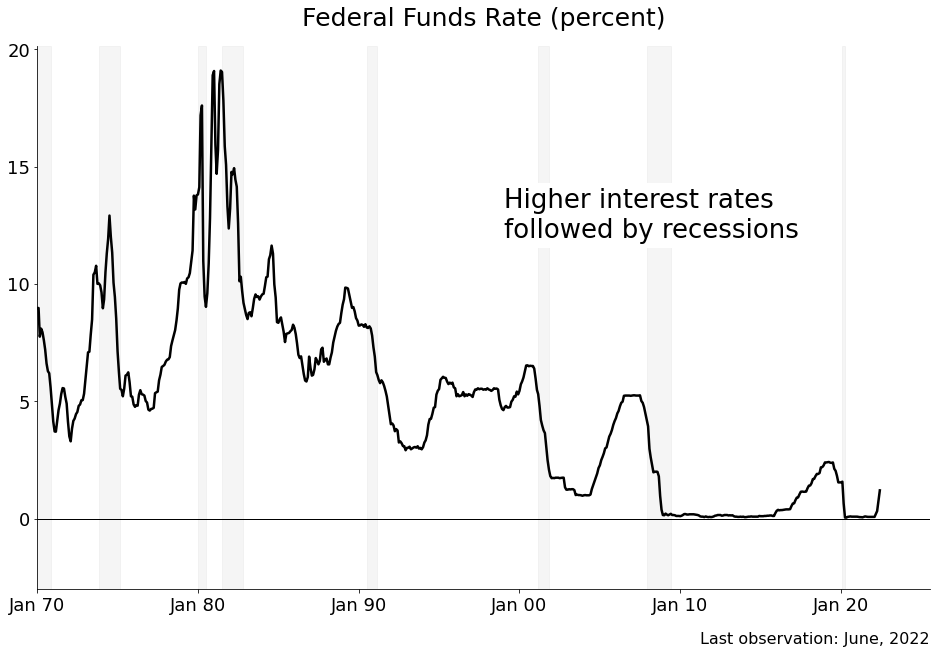

In [16]:
fig, ax = plt.subplots(figsize=(16,10))
sns.despine()
ax.tick_params(axis='both', labelsize=fig_tick_size )

ax.xaxis.set_major_formatter(date_fmt)
ax.set_title('Federal Funds Rate (percent)', fontsize=25, pad=20)

ax.plot(nat_long.index, nat_long['inf'], color='firebrick', lw=fig_line_wt, label='National', alpha=0)
ax.plot(ff.index, ff['FEDFUNDS'], color='black', lw=fig_line_wt, label='Effective Federal Funds')

#ax.grid(axis='y')
ax.text(dt.datetime(1999,1,15), 12, 'Higher interest rates\nfollowed by recessions', 
        fontsize=26, alpha=1, color='black', backgroundcolor='white')

#ax.text(dt.datetime(1985,1,15), 11, 'Fed funds rate', fontsize=24, alpha=1, color='black')

ax.axhline(y=0, color='black', lw=1)
ax.set_xlim(dt.datetime(1970,1,1))

for c in range(26,35):
    plt.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)

ax.annotate(last_obs(ff), xy=(1, -0.1), xycoords='axes fraction', fontsize=16, ha='right')

plt.savefig('ff.svg', bbox_inches='tight')
plt.show()

